## Prepping the Data

Loading Software

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import urllib
import requests
import json
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler



In [2]:
#after new kernall and cc clean

"""
Data Cleaned to cell 17 (run time 3 minutes) [c17=3]
[c46 =7], [c48 =10]
Data to cell 46 (run time another 4 minutes); Data to cell 47 (run time another 1 minute)
Data to cell 48 (run time another 4 minute); Data to cell 55 (run time another 2 minute)
Total: 14 minutes
"""
#first Checkpoint
"""
Data Cleaned to cell 60 (1 minute); Data Cleaned to cell 68 (7 minute)
Data Cleaned to cell 69 (1 minute); Data Cleaned to cell 75 (4 minute)
Data Cleaned to cell 91 (2 minute)  (aka) to standard scaler
#if things are cookyy check z3 and z3
"""

'\nData Cleaned to cell 60 (1 minute); Data Cleaned to cell 68 (7 minute)\nData Cleaned to cell 69 (1 minute); Data Cleaned to cell 75 (4 minute)\nData Cleaned to cell 91 (2 minute)  (aka) to standard scaler\n#if things are cookyy check z3 and z3\n'

Loading Data

In [3]:
#Get Path
os.getcwd()
basepath = os.getcwd()
print(basepath)
lis_dir = os.listdir()
print(lis_dir)

# Create the list of file names: filenames
"""
The Below file which I used was too big to upload to github so a saved version of a cleaned data set is used
file ='vehicles.csv'

"""
file = 'vehicles.csv'
sub_file = 'data'
file_name_path = os.path.join(basepath, sub_file, file)
auto_data= pd.read_csv(file_name_path)



#Open data
auto_data.head(5)

C:\Users\Tiki\Documents\Sprinboard2\Capstone_cars
['.ipynb_checkpoints', '575_1100_compressed_data.csv', '575_1100_compressed_data.csv.zip', '62920_1026452_bundle_archive.zip', 'auto1.ipynb', 'auto1_datawrangling.ipynb', 'auto2.ipynb', 'auto2_Combining Data.ipynb', 'auto3.ipynb', 'autodata3_EDA.ipynb', 'autodata4-imputing Data.ipynb', 'autodata4-PCA.ipynb', 'autodata4.ipynb', 'auto_clean.ipynb', 'auto_clean_copy.ipynb', 'correlation.png', 'data', 'figures', 'Untitled.ipynb', 'Untitled1.ipynb']


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


Exploratory Data1

In [4]:
#Print the columns names of the entire dataframe
print(auto_data.columns)
# Review the column names, null value counts and data types of your data frame.
auto_data.info()


Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            539759 non-null  int64  
 1   url           539759 non-null  object 
 2   region        539759 non-null  object 
 3   region_url    539759 non-null  object 
 4   price         539759 non-null  int64  
 5   year          538772 non-null  float64
 6   manufacturer  516175 non-null  object 
 7   model         531746 non-null  object 
 8   condition     303707 non-null  object 
 9   cylinders     321264 non-null  object 
 10  fuel          536366 non-null  object 


Variables drop
#url   - We will not be using urls in this study, 
#region_url   - We have already have region
#image_url #We do not need photos at the moment 
#county    #there is no non 0 data points there

In [5]:
auto_data= auto_data.drop(columns=['url', 'region_url', 'image_url', 'county'])
print(auto_data.columns)


#known main points for an auto sale condition, age, mileage, type of car if the cars don't have it we don't want it
auto_data = auto_data[auto_data['condition'].notna()]  #if condition is unknown from wreck to clean we don't need itnew_file = 'autosub.csv'
auto_data = auto_data[auto_data['year'].notna()]  #if we don't know model year we don't know age
auto_data = auto_data[auto_data['odometer'].notna()]  #odometer measures mileage
auto_data = auto_data[auto_data['model'].notna()]  #we don't know the model car we don't know the car
auto_data = auto_data[auto_data['price'].notna()]  #we don't know the model car we don't know the car



Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'size', 'type', 'paint_color', 'description', 'state', 'lat',
       'long'],
      dtype='object')


Transforming Rules: Common Sense

* Cylinders can be numeric
* Manufacturer names should be consistent




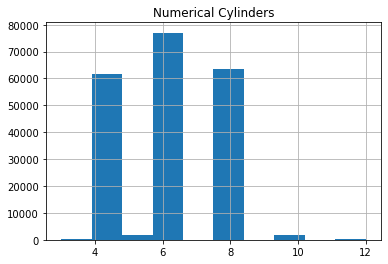

In [6]:
#Turn Cylinder column from string to numeric
auto_data['cyl'] = auto_data['cylinders']
auto_data['cyl'] = auto_data['cyl'].replace('other', np.nan)
auto_data['cyl'] = auto_data['cyl'].astype(str).str[0:2]
auto_data['cyl'] = auto_data['cyl'].str.strip()
auto_data['cyl'] = auto_data['cyl'].replace('na', np.nan)
auto_data['cyl'] = pd.to_numeric(auto_data['cyl'])
auto_data['cylinders']= auto_data['cyl']
auto_data= auto_data.drop(['cyl'], axis=1)

#plot Cylinders
plt.title("Numerical Cylinders")
hist = auto_data.cylinders.hist(bins=10)

In [7]:
#Neaten Strings
#Fix manufacturer
auto_data['manufacturer']= auto_data['manufacturer'].str.title().str.strip()
auto_data['manufacturer']= auto_data['manufacturer'].str.replace(' ', '-')
auto_data['manufacturer']= auto_data['manufacturer'].str.replace('rover' , 'land-rover') 
auto_data['manufacturer']= auto_data['manufacturer'].str.replace('land-land' , 'land')
auto_data['manufacturer']= auto_data['manufacturer'].str.replace('porche', 'porsche')
auto_data['manufacturer']= auto_data['manufacturer'].str.replace('---', '-')
auto_data['manufacturer']= auto_data['manufacturer'].str.replace('--', '-')


#Fix model
auto_data['model']= auto_data['model'].str.title().str.strip()
auto_data['model']= auto_data['model'].str.replace(' ', '-')
auto_data['model']= auto_data['model'].str.replace('---', '-')
auto_data['model']= auto_data['model'].str.replace('--', '-')

#States are state codes
auto_data['state'] = auto_data['state'].str.upper().str.strip()

#If no paint color is given its unlisted and its unrealistc to try to impute it
auto_data['paint_color'] = auto_data['paint_color'].fillna('unlisted')


Cleaning Rules: Common Sense

* This study is not looking at over luxury cars/ antique cars  so 
    * None of the vehicles should have a price greater than half a million
* This study is not looking at motorbikes or bus's 
    * we don't need harley davidson's or henessey's 
    *
* This study is not looking at junker cars so we do not need vehicles 
    * of a value of a 100 dollars or less
    * with over a half milion miles on them
    * are of poor condition
    * older than 10 years old (we are also not looking at antique cars
    * that has a condition/title status is better than salvage 
* Cleaning Obvious errors:
    * We are looking at used vehicles so the vehicles age should be greater than 1 year
* We do not need to take into consideration vehicles older than 10 years old. 




In [8]:
# If we are dealing with a vehicle with over a half milion miles we have more problem
auto_data = auto_data[(auto_data.odometer< 500000)] 


#This study is not look at eather junkers or antiques so 
#a: age has to be greater than 0 and less than 11 years
#b: price has to be greater than $100 and less than half million
#c: mileage has to be greater than or equal to 0 and less than half million

auto_data['age'] = 2020-auto_data['year']
auto_data = auto_data[(auto_data.age > 0) & (auto_data.age <= 10)]
auto_data = auto_data[(auto_data.price >= 100) & (auto_data.price <= 500000)]
auto_data = auto_data[(auto_data.odometer >= 0) & (auto_data.odometer <= 500000)]


print(f"Maximum price: $ {auto_data.price.max()} \nMinimum price: $ {auto_data.price.min()} ")
print(f"Maximum age:  {auto_data.age.max()} years \nMinimum age: {auto_data.age.min()} years ")
print(f"Maximum mileage: {auto_data.odometer.max()} \nMinimum mileage: {auto_data.odometer.min()} ")


Maximum price: $ 479000 
Minimum price: $ 100 
Maximum age:  10.0 years 
Minimum age: 1.0 years 
Maximum mileage: 499103.0 
Minimum mileage: 0.0 


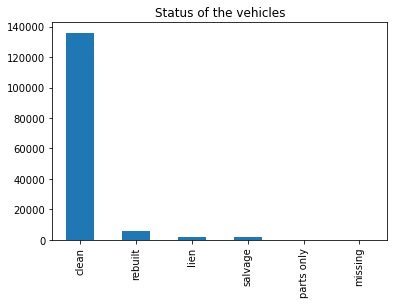

In [9]:
#This study is not look junkers so condition and title_ status is better than salvage

#See Status of Vehicles
auto_data.title_status.value_counts().plot.bar()
plt.title("Status of the vehicles")
plt.show()


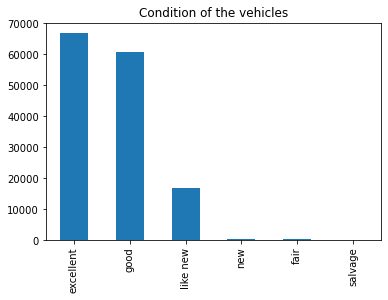

In [10]:
#See Condition of Vehicles

auto_data.condition.value_counts().plot.bar()
plt.title("Condition of the vehicles")
plt.show()

In [11]:
#This study is not look junkers so condition and title_ status is better than salvage

idx1 = auto_data[auto_data["condition"] == "salvage"].index

for w in ["salvage","lien","missing","parts only", 'rebuilt']:
    idx2 = auto_data[auto_data["title_status"] == w].index
    idx1 = idx1.union(idx2)
    
auto_data.drop(idx1, axis = 0, inplace = True)

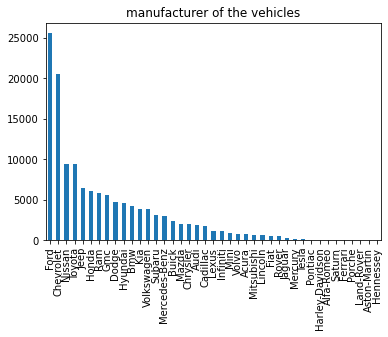

In [12]:
#We are not looking at motorbikes

#Graph manufacturers

auto_data.manufacturer.value_counts().plot.bar()
plt.title("manufacturer of the vehicles")
plt.show()

In [13]:

#We are not looking at motorbikes
auto_data = auto_data[auto_data.manufacturer != 'Harley-Davidson']
auto_data = auto_data[auto_data.manufacturer != 'Hennessey']

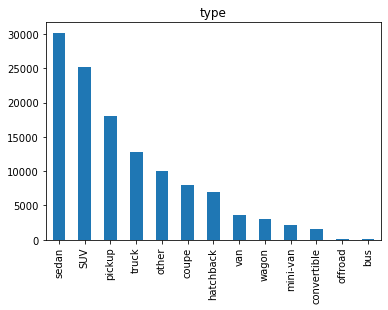

In [14]:
#We are not looking at buses
#Graph type

auto_data.type.value_counts().plot.bar()
plt.title("type")
plt.show()

In [15]:
#We are not looking at bus
auto_data = auto_data[auto_data.type != 'bus']


In [16]:
#Create Make Model Model Year Key (Useful for later)
auto_data['mmy_a']=auto_data['manufacturer']+' '+auto_data['model']+ ' '+ auto_data['year'].astype(int).astype(str)
auto_data['mmy_a']=auto_data['mmy_a'].str.title()

auto_data['mmy_a2']=auto_data['manufacturer']+' '+auto_data['model'].str.split(' ').str[0]+ ' '+ auto_data['year'].astype(int).astype(str)
auto_data['mmy_a2']=auto_data['mmy_a2'].str.title()


In [17]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135727 entries, 2 to 539744
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            135727 non-null  int64  
 1   region        135727 non-null  object 
 2   price         135727 non-null  int64  
 3   year          135727 non-null  float64
 4   manufacturer  132945 non-null  object 
 5   model         135727 non-null  object 
 6   condition     135727 non-null  object 
 7   cylinders     97611 non-null   float64
 8   fuel          135724 non-null  object 
 9   odometer      135727 non-null  float64
 10  title_status  135721 non-null  object 
 11  transmission  135597 non-null  object 
 12  vin           101548 non-null  object 
 13  drive         112838 non-null  object 
 14  size          53166 non-null   object 
 15  type          121778 non-null  object 
 16  paint_color   135727 non-null  object 
 17  description   135725 non-null  object 
 18  stat

In [18]:
auto_data.describe()

,id,price,year,cylinders,odometer,lat,long,age
count,1.357270e+05,135727.000000,135727.000000,97611.000000,135727.000000,134609.000000,134609.000000,135727.000000
mean,7.087762e+09,16973.619169,2014.187406,5.871961,78793.417802,37.929716,-90.857017,5.812594
std,5.017427e+06,10941.063667,2.571319,1.589426,50566.719017,5.354975,15.904730,2.571319
min,7.065765e+09,100.000000,2010.000000,3.000000,0.000000,-51.393200,-166.377000,1.000000
25%,7.085149e+09,9900.000000,2012.000000,4.000000,37688.000000,33.786500,-96.890000,4.000000
50%,7.088879e+09,15195.000000,2014.000000,6.000000,73319.000000,38.349100,-84.510000,6.000000
75%,7.091975e+09,21900.000000,2016.000000,8.000000,111717.000000,42.064100,-80.257100,8.000000
max,7.093536e+09,450000.000000,2019.000000,12.000000,499103.000000,84.514800,94.124800,10.000000


Save Data

In [19]:
sub_file = 'data'
new_file = 'auto_data.csv'
new_file_name_path = os.path.join(basepath,sub_file, new_file)
auto_data.to_csv(new_file_name_path, index=False)

## Categorical Data
We want data on what segment the vehicle is in as that might change the prices signicantly.
We got this data from back4app an open data source.
Website: https://www.back4app.com/database/back4app/car-make-model-dataset

In [20]:
#Get Categorical Data

where = urllib.parse.quote_plus("""
{
    "Category": {
        "$exists": true
    },
    "Year": {
        "$gte": 2010
    }
}
""")
url = 'https://parseapi.back4app.com/classes/Carmodels_Car_Model_List?limit=5000&where=%s' % where
headers = {
    'X-Parse-Application-Id': 'pozCwVISt2yfzi2wJjwo0JiMIJclsUAOchP4AuJO', # This is your app's application id
    'X-Parse-REST-API-Key': 'Jtc8r91VIJOizG8ReKkaseZcugQjAx4vG1WKbJye' # This is your app's REST API key
}
data_json = json.loads(requests.get(url, headers=headers).content.decode('utf-8')) # Here you have the data that you need


#import collections

In [21]:
#the above data was too nested a dictionaries listed in a list that was in a list that was a dictionary
print(type(data_json))
list_values = [ v for v in data_json.values() ] #undoes dictionary

list_value_items = [y for x in list_values for y in x] # undoes list

cat_data = pd.DataFrame.from_dict(list_value_items) #turns list of dictionaries into data frame


<class 'dict'>


In [22]:
#we don't need object id or created at
cat_data= cat_data.drop(['objectId', 'createdAt'], axis=1)
print(cat_data.head())
cat_data.describe()

   Year       Make         Model            Category                 updatedAt
0  2020       Audi            Q3                 SUV  2020-01-27T20:44:17.665Z
1  2020  Chevrolet        Malibu               Sedan  2020-01-27T20:44:17.665Z
2  2020   Cadillac  Escalade ESV                 SUV  2020-01-27T20:44:17.665Z
3  2020  Chevrolet      Corvette  Coupe, Convertible  2020-01-27T20:44:17.665Z
4  2020      Acura           RLX               Sedan  2020-01-27T20:44:17.665Z


,Year
count,4082.000000
mean,2015.034052
std,3.028828
min,2010.000000
25%,2012.000000
50%,2015.000000
75%,2018.000000
max,2020.000000


In [23]:
#Neaten Strings
cat_data['Make'] = cat_data['Make'].str.title().str.strip()
cat_data['Make']= cat_data['Make'].str.replace(' ', '-') 
cat_data['Model'] = cat_data['Model'].str.title().str.strip()
cat_data['Model']= cat_data['Model'].str.replace(' ', '-') 

#Create Key
cat_data['mmy']=cat_data['Make']+' '+cat_data['Model'].str.strip()+ ' '+ cat_data['Year'].astype(int).astype(str)
cat_data['mmy']= cat_data['mmy'].str.title()

cat_data['mmy2']=cat_data['Make']+' '+cat_data['Model'].str.split(' ').str[0]+' '+ cat_data['Year'].astype(int).astype(str)
cat_data['mmy2']= cat_data['mmy2'].str.title()



In [24]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       4082 non-null   int64 
 1   Make       4082 non-null   object
 2   Model      4082 non-null   object
 3   Category   4082 non-null   object
 4   updatedAt  4082 non-null   object
 5   mmy        4082 non-null   object
 6   mmy2       4082 non-null   object
dtypes: int64(1), object(6)
memory usage: 223.4+ KB


In [25]:

#Save Categorical Data
sub_file = 'data'
new_file = 'cat_data.csv'
new_file_name_path = os.path.join(basepath,sub_file, new_file)
cat_data.to_csv(new_file_name_path, index=False)

## auto_data2

## Find MSRP data
The original price of the car will heavily effect the older price. Let's bring that out.
This data is a downloaded file from https://www.kaggle.com/CooperUnion/cardataset . This data was obtained by scraping edmunds (a car rating website) and twitter.

In [26]:
# Create the list of file names: filenames
file ='msrp.csv'
sub_file = 'data'
file_name_path = os.path.join(basepath, sub_file, file)
msrp_data= pd.read_csv(file_name_path)

#Open data
msrp_data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,mmy,mmy2
0,Bmw,1-Series-M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,Bmw 1-Series-M 2011,Bmw 1-Series-M 2011
1,Bmw,1-Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,Bmw 1-Series 2011,Bmw 1-Series 2011
2,Bmw,1-Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,Bmw 1-Series 2011,Bmw 1-Series 2011
3,Bmw,1-Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,Bmw 1-Series 2011,Bmw 1-Series 2011
4,Bmw,1-Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,Bmw 1-Series 2011,Bmw 1-Series 2011


In [27]:
#From the previous cleaning rules we eliminate vehicles with value of over half a million and an age over 10 years

print(f"Maximum MSRP: {msrp_data.MSRP.max()} \nMinimum MSRP: {msrp_data.MSRP.min()} ")
# If we are dealing with a vehicle with an MSRP over half milion miles we have more problem
msrp_data = msrp_data[(msrp_data.MSRP< 500000 )] 
print(f"Maximum Year: {msrp_data.Year.max()} \nMinimum Year: {msrp_data.Year.min()} ")
# We only need vehicles with over a 2009 MY
msrp_data = msrp_data[(msrp_data.Year> 2009 )] 



Maximum MSRP: 497650 
Minimum MSRP: 11965 
Maximum Year: 2017 
Minimum Year: 2010 


In [28]:
# Clean Strings/ Neaten Strings
msrp_data['Make']= msrp_data['Make'].str.title().str.strip()
msrp_data['Make']= msrp_data['Make'].str.replace(' ', '-')
msrp_data['Model']= msrp_data['Model'].str.title().str.strip()
msrp_data['Model']= msrp_data['Model'].str.replace(' ', '-')

#Make Keys
msrp_data['mmy']=msrp_data['Make']+' '+msrp_data['Model']+ ' '+ msrp_data['Year'].astype(int).astype(str)
msrp_data['mmy']= msrp_data['mmy'].str.title()
msrp_data['mmy2']=msrp_data['Make']+' '+msrp_data['Model'].str.split(' ').str[0]+ ' '+ msrp_data['Year'].astype(int).astype(str)
msrp_data['mmy2']= msrp_data['mmy2'].str.title()



In [29]:
MSRP_dict = msrp_data.groupby(['Make', 'Model', 'Year', 'mmy', 'mmy2'])['MSRP'].mean().reset_index()

In [30]:
MSRP_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Make    1363 non-null   object 
 1   Model   1363 non-null   object 
 2   Year    1363 non-null   int64  
 3   mmy     1363 non-null   object 
 4   mmy2    1363 non-null   object 
 5   MSRP    1363 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 64.0+ KB


In [31]:
sub_file = 'data'
new_file = 'msrp.csv'
new_file_name_path = os.path.join(basepath,sub_file, new_file)
msrp_data.to_csv(new_file_name_path, index=False)

## Find State data
We can use geographic data to find other data we need. Two things that effect prices is the amount of money people make so let's include that
Similarly car prices are often influenced by gas prices so we will include that as well

Gas prices come from AAA which shows the daily average gas prices for a state. They do not store this data so the data was scraped from the next nearest date availble from the scraping of the craiglist data which was Feb 22
https://web.archive.org/web/20200226222808/https://gasprices.aaa.com/state-gas-price-averages/

This data for household income was from https://dqydj.com/average-income-by-state-median-top-percentiles/ a place that holds financial data and that is reccomend by theWSJ and the NYT. This has already been done

# Merging Data

In [32]:
## Merging Auto and MSRP

#Create Dictionaries to map with

First the MMY
* automobiles models are referenced by its a) manufacture b) model name, and C) model year (otherwise known as the MMY)
* Each mmy has an average MSRP to go with it and a specific groups of catehories can be in 
    * (ex a camry can be sedan or hatchback it can't be a pickup)
* We will therefore use the MMYas a key to map the MSRP and category to the main data set

Issue: Model names of automobile
* The trim of a model is referencing a set of additional features comes with (example Camry Lux has leather seats)
* The trim changes the price of a vehicle
* Therefore sometimes sellers will add the trim after the model design to give a better idea of what they are selling
* This leads to the model name not being consistent across tables.

Fixing the Issue
* To ensure better mapping we will therefore use 2 keys 
* The first key will match the full name of the model for the mmy
* The second key will match the first word name of the model for the mmy
* We will try to map to first the key if a map isn't reached we use the results from the second key.
* both keys include the manufacturer and model year



In [33]:
#Create Dictionaries to map with


#create mmy key2 for autos
auto_data['model2']= auto_data['model'].str.split(' ').str[0]
auto_data['mmy_a2']=auto_data['manufacturer']+' '+auto_data['model2']+ ' '+ auto_data['year'].astype(int).astype(str)

#auto_dictionary
auto_dict= auto_data[['manufacturer', 'model', 'year', 'mmy_a', 'mmy_a2']].drop_duplicates(keep='last')

#MSRP_dictionary_1 has only the first key
MSRP_dict1 = MSRP_dict[['mmy', 'MSRP']]

#MSRP_dictionary_2 has only the second key
MSRP_dict2= MSRP_dict[['mmy2', 'MSRP']]
MSRP_dict2['MSRP_vague'] = MSRP_dict2['MSRP']
MSRP_dict2= MSRP_dict2.drop(columns= ['MSRP'])



C:\Users\Tiki\anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [34]:
#Merge auto_dict and MSRP dictionary 1 into df1 using the 1st key
df1= pd.merge(auto_dict, MSRP_dict1, left_on='mmy_a', right_on= 'mmy', how='outer' )
#Merge dictionary3 and MSRP dictionary 2 into auto_msrp_dictionary using the second key
a_m_dict= pd.merge(df1, MSRP_dict2, left_on='mmy_a2', right_on= 'mmy2', how='outer' )

#fill any null results in MSRP from first key map by results in second key
a_m_dict['MSRP']=a_m_dict['MSRP'].fillna(a_m_dict['MSRP_vague']) 

#drop duplicates
a_m_dict= a_m_dict[['mmy_a', 'mmy', 'mmy2','MSRP']].drop_duplicates(subset=['mmy_a', 'mmy', 'mmy2'], keep= 'last' )


In [35]:
#Cat_dictionary_1 has only the first key
cat_dict= cat_data[['Make', 'Model', 'Year', 'mmy', 'mmy2','Category']].drop_duplicates(subset=['Make', 'Model', 'Year', 'mmy', 'mmy2'], keep='last')
cat_dict1 = cat_dict[['mmy', 'Category']]


#Cat_dictionary_2 has only the second key
cat_dict2= cat_dict[['mmy2', 'Category']]
cat_dict2['Category_vague'] = cat_dict2['Category']
cat_dict2= cat_dict2.drop(columns= ['Category'])


C:\Users\Tiki\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
#Merge auto dictionary and cat dictionary 1 into dictionary into df1 using the first key
df1= pd.merge(auto_dict, cat_dict1, left_on='mmy_a', right_on= 'mmy', how='outer' )

#Merge dictionary3 and cat dictionary 2 into auto_cat_dictionary using the second key
a_c_dict= pd.merge(df1, cat_dict2, left_on='mmy_a2', right_on= 'mmy2', how='outer' )

#Fill in blanks in the Category left from the first key with results from the second key (if any)
a_c_dict['Category']=a_c_dict['Category'].fillna(a_c_dict['Category_vague']) 


#drop duplicates 
a_c_dict= a_c_dict[['mmy_a', 'mmy', 'mmy2','Category']].drop_duplicates(subset=['mmy_a', 'mmy', 'mmy2'], keep= 'last' )


In [37]:
print(a_c_dict.info())
print(a_m_dict.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24602 entries, 0 to 26060
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   mmy_a     20787 non-null  object
 1   mmy       4082 non-null   object
 2   mmy2      4082 non-null   object
 3   Category  5989 non-null   object
dtypes: object(4)
memory usage: 961.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21814 entries, 0 to 23272
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mmy_a   20787 non-null  object 
 1   mmy     1363 non-null   object 
 2   mmy2    1363 non-null   object 
 3   MSRP    1876 non-null   float64
dtypes: float64(1), object(3)
memory usage: 852.1+ KB
None


In [38]:
#Merge Cat and MSRP
#We still have two keys mmy_a and mmy

a_m_dict_1= a_m_dict[['mmy_a', 'MSRP']].dropna()
a_m_dict_2= a_m_dict[['mmy', 'MSRP']].dropna()
a_m_dict_3= a_m_dict[['mmy2', 'MSRP']].dropna()

a_m_dict_2= a_m_dict_2.rename(columns={"MSRP": "MSRP_2"})
a_m_dict_3= a_m_dict_3.rename(columns={"MSRP": "MSRP_3"})


In [39]:
#Merge a_c and a_m dict on first key
df1= pd.merge(a_c_dict, a_m_dict_1, on='mmy_a', how='outer')


In [40]:
#Merge a_c and a_m dict on second key
df2 = pd.merge(df1,  a_m_dict_2, left_on='mmy', right_on='mmy', how='outer' )


In [41]:
#Merge a_c and a_m dict on third key
a_m_c_dict = pd.merge(df2,  a_m_dict_3, on='mmy2', how='outer' )
a_m_c_dict.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 25410 entries, 0 to 25409
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mmy_a     20787 non-null  object 
 1   mmy       4486 non-null   object 
 2   mmy2      4486 non-null   object 
 3   Category  5989 non-null   object 
 4   MSRP      850 non-null    float64
 5   MSRP_2    1363 non-null   float64
 6   MSRP_3    1363 non-null   float64
dtypes: float64(3), object(4)
memory usage: 1.6+ MB


In [42]:
#Fill in blanks in the MSRP left from 1st key with results from the 2nd and 3rd key (if any)
a_m_c_dict['MSRP']=a_m_c_dict['MSRP'].fillna(a_m_c_dict['MSRP_2']) 
a_m_c_dict['MSRP']=a_m_c_dict['MSRP'].fillna(a_m_c_dict['MSRP_3']) 

#drop duplicates
a_m_c_dict= a_m_c_dict[['mmy_a', 'MSRP', 'Category']].drop_duplicates(subset=['mmy_a'], keep= 'last' )

#drop if missing 'mmy_a'
a_m_c_dict = a_m_c_dict[a_m_c_dict['mmy_a'].notna()]


Merge Dictionaries with auto

In [43]:
z= pd.merge(auto_data, a_m_c_dict, on='mmy_a', how='left')
z.info()
auto_data= z

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135727 entries, 0 to 135726
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            135727 non-null  int64  
 1   region        135727 non-null  object 
 2   price         135727 non-null  int64  
 3   year          135727 non-null  float64
 4   manufacturer  132945 non-null  object 
 5   model         135727 non-null  object 
 6   condition     135727 non-null  object 
 7   cylinders     97611 non-null   float64
 8   fuel          135724 non-null  object 
 9   odometer      135727 non-null  float64
 10  title_status  135721 non-null  object 
 11  transmission  135597 non-null  object 
 12  vin           101548 non-null  object 
 13  drive         112838 non-null  object 
 14  size          53166 non-null   object 
 15  type          121778 non-null  object 
 16  paint_color   135727 non-null  object 
 17  description   135725 non-null  object 
 18  stat

## Add State Data

In [44]:


#get_state_data
state_file ='state_data.csv'

print('p')
file_name_path = os.path.join(basepath, 'data', state_file)
state_data= pd.read_csv(file_name_path)
state_data.info()
#Open data


p
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    51 non-null     object 
 1   Avg_Gas_Price            51 non-null     float64
 2   Division                 51 non-null     object 
 3   Median Household Income  51 non-null     float64
 4   State_Code               51 non-null     object 
dtypes: float64(2), object(3)
memory usage: 2.1+ KB


In [45]:
#merge_with_state_data
auto_data_m= auto_data.merge(state_data, left_on='state', right_on='State_Code')
auto_data_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135727 entries, 0 to 135726
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       135727 non-null  int64  
 1   region                   135727 non-null  object 
 2   price                    135727 non-null  int64  
 3   year                     135727 non-null  float64
 4   manufacturer             132945 non-null  object 
 5   model                    135727 non-null  object 
 6   condition                135727 non-null  object 
 7   cylinders                97611 non-null   float64
 8   fuel                     135724 non-null  object 
 9   odometer                 135727 non-null  float64
 10  title_status             135721 non-null  object 
 11  transmission             135597 non-null  object 
 12  vin                      101548 non-null  object 
 13  drive                    112838 non-null  object 
 14  size

In [46]:
auto_data.select_dtypes(exclude=['int64', 'float']).nunique()

region             402
manufacturer        39
model            10683
condition            5
fuel                 5
title_status         1
transmission         3
vin              55997
drive                3
size                 4
type                12
paint_color         13
description     114186
state               51
mmy_a            20787
mmy_a2           20787
model2           10683
Category            38
dtype: int64

In [47]:

auto_data['mm']=auto_data['manufacturer']+' '+auto_data['model']
auto_data['mm2']=auto_data['manufacturer']+' '+auto_data['model2']


       
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135727 entries, 0 to 135726
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            135727 non-null  int64  
 1   region        135727 non-null  object 
 2   price         135727 non-null  int64  
 3   year          135727 non-null  float64
 4   manufacturer  132945 non-null  object 
 5   model         135727 non-null  object 
 6   condition     135727 non-null  object 
 7   cylinders     97611 non-null   float64
 8   fuel          135724 non-null  object 
 9   odometer      135727 non-null  float64
 10  title_status  135721 non-null  object 
 11  transmission  135597 non-null  object 
 12  vin           101548 non-null  object 
 13  drive         112838 non-null  object 
 14  size          53166 non-null   object 
 15  type          121778 non-null  object 
 16  paint_color   135727 non-null  object 
 17  description   135725 non-null  object 
 18  stat

In [48]:
df= auto_data
auto_data['drive1']= auto_data['drive'].fillna('')
auto_data['cylinders1']= auto_data['cylinders'].fillna('')


#Cylinders and drive are closely related so first class on that
#data explaining that is auto_3_eda
df['cylinders'] = df.groupby(['mmy_a', 'drive1'], sort=False)['cylinders'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))
df['drive'] = df.groupby(['mmy_a', 'cylinders1' ], sort=False)['drive'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))

df['cylinders'] = df.groupby(['mmy_a'], sort=False)['cylinders'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))
df['drive'] = df.groupby(['mmy_a'], sort=False)['drive'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))

df['cylinders'] = df.groupby(['model'], sort=False)['cylinders'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))
df['drive'] = df.groupby(['model'], sort=False)['drive'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))


In [49]:

#on size
df['size'] = df.groupby(['mmy_a', 'drive1'], sort=False)['size'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))
df['size'] = df.groupby(['mmy_a', 'cylinders1' ], sort=False)['size'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))
df['size'] = df.groupby(['mmy_a'], sort=False)['size'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))
df['size'] = df.groupby(['model', 'drive1'], sort=False)['size'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))
df['size'] = df.groupby(['model', 'cylinders1' ], sort=False)['size'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))
df['size'] = df.groupby(['model'], sort=False)['size'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135727 entries, 0 to 135726
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            135727 non-null  int64  
 1   region        135727 non-null  object 
 2   price         135727 non-null  int64  
 3   year          135727 non-null  float64
 4   manufacturer  132945 non-null  object 
 5   model         135727 non-null  object 
 6   condition     135727 non-null  object 
 7   cylinders     120710 non-null  float64
 8   fuel          135724 non-null  object 
 9   odometer      135727 non-null  float64
 10  title_status  135721 non-null  object 
 11  transmission  135597 non-null  object 
 12  vin           101548 non-null  object 
 13  drive         130150 non-null  object 
 14  size          106924 non-null  object 
 15  type          121778 non-null  object 
 16  paint_color   135727 non-null  object 
 17  description   135725 non-null  object 
 18  stat

In [50]:
#Why didn't this work?? 

"""
q1 = auto_data
ts_vars = ['mmy_a', 'mm_', 'mm2', 'manufacturer']
ls_vars = ['drive', 'cylinders', 'size', 'tranmission', 'type', 'MSRP', 'Category']


for ts_var in ts_vars
    ts_list = q1[ts_var].unique().tolist()
    for ts in ts_list:
        dfelse = q1[q1[ts_var]== ts]
        for ls_var in ls_vars:
            try:
                x = dfelse[ls_var].mode()[0]
                q1.loc[(q1['mmy_a']== mmy_a_l) & (q1[ls_var].isna()), ls_var ] = x
            except: 
                pass
"""



"\nq1 = auto_data\nts_vars = ['mmy_a', 'mm_', 'mm2', 'manufacturer']\nls_vars = ['drive', 'cylinders', 'size', 'tranmission', 'type', 'MSRP', 'Category']\n\n\nfor ts_var in ts_vars\n    ts_list = q1[ts_var].unique().tolist()\n    for ts in ts_list:\n        dfelse = q1[q1[ts_var]== ts]\n        for ls_var in ls_vars:\n            try:\n                x = dfelse[ls_var].mode()[0]\n                q1.loc[(q1['mmy_a']== mmy_a_l) & (q1[ls_var].isna()), ls_var ] = x\n            except: \n                pass\n"

In [51]:

#on Category
df['Category1'] = df['Category']
df['Category1'] = df.groupby(['mm'], sort=False)['Category1'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))
df['Category'] = df.groupby(['mm2'], sort=False)['Category1'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135727 entries, 0 to 135726
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            135727 non-null  int64  
 1   region        135727 non-null  object 
 2   price         135727 non-null  int64  
 3   year          135727 non-null  float64
 4   manufacturer  132945 non-null  object 
 5   model         135727 non-null  object 
 6   condition     135727 non-null  object 
 7   cylinders     120710 non-null  float64
 8   fuel          135724 non-null  object 
 9   odometer      135727 non-null  float64
 10  title_status  135721 non-null  object 
 11  transmission  135597 non-null  object 
 12  vin           101548 non-null  object 
 13  drive         130150 non-null  object 
 14  size          106924 non-null  object 
 15  type          121778 non-null  object 
 16  paint_color   135727 non-null  object 
 17  description   135725 non-null  object 
 18  stat

In [52]:
auto_data1= df

In [53]:
#impute long_lat from state
auto_data1['fuel'] = auto_data1['fuel'].fillna(auto_data['fuel'].mode()[0])
auto_data1['lat'] = auto_data1.groupby(['state'], sort=False)['lat'].apply(lambda x: x.fillna(x.mode().iloc[0]))
auto_data['long'] = auto_data1.groupby(['state'], sort=False)['long'].apply(lambda x: x.fillna(x.mode().iloc[0]))


In [54]:
auto_data['Avg_Mileage'] = auto_data['odometer']/ auto_data['age']
auto_data['resid'] = auto_data['MSRP']/ auto_data['price']
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135727 entries, 0 to 135726
Data columns (total 34 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            135727 non-null  int64  
 1   region        135727 non-null  object 
 2   price         135727 non-null  int64  
 3   year          135727 non-null  float64
 4   manufacturer  132945 non-null  object 
 5   model         135727 non-null  object 
 6   condition     135727 non-null  object 
 7   cylinders     120710 non-null  float64
 8   fuel          135727 non-null  object 
 9   odometer      135727 non-null  float64
 10  title_status  135721 non-null  object 
 11  transmission  135597 non-null  object 
 12  vin           101548 non-null  object 
 13  drive         130150 non-null  object 
 14  size          106924 non-null  object 
 15  type          121778 non-null  object 
 16  paint_color   135727 non-null  object 
 17  description   135725 non-null  object 
 18  stat

In [55]:
auto_data = auto_data.drop(columns=['mmy_a', 'mmy_a2', 'mm', 'mm2', 'model2', 'cylinders1', 'drive1' ], axis=1 )

auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135727 entries, 0 to 135726
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            135727 non-null  int64  
 1   region        135727 non-null  object 
 2   price         135727 non-null  int64  
 3   year          135727 non-null  float64
 4   manufacturer  132945 non-null  object 
 5   model         135727 non-null  object 
 6   condition     135727 non-null  object 
 7   cylinders     120710 non-null  float64
 8   fuel          135727 non-null  object 
 9   odometer      135727 non-null  float64
 10  title_status  135721 non-null  object 
 11  transmission  135597 non-null  object 
 12  vin           101548 non-null  object 
 13  drive         130150 non-null  object 
 14  size          106924 non-null  object 
 15  type          121778 non-null  object 
 16  paint_color   135727 non-null  object 
 17  description   135725 non-null  object 
 18  stat

In [56]:
#save data

new_file = 'auto_data_merged_cl.csv'
new_file_name_path = os.path.join(basepath,sub_file, new_file)
auto_data.to_csv(new_file_name_path, index=False)

## Exploratory Data getting rid of outliers

In [57]:
#Get Path
os.getcwd()
basepath = os.getcwd()
print(basepath)
lis_dir = os.listdir()
print(lis_dir)

# Create the list of file names: filenames
file ='auto_data_merged_cl.csv'
sub_file = 'data'
file_name_path = os.path.join(basepath, sub_file, file)
auto_data= pd.read_csv(file_name_path)


C:\Users\Tiki\Documents\Sprinboard2\Capstone_cars
['.ipynb_checkpoints', '575_1100_compressed_data.csv', '575_1100_compressed_data.csv.zip', '62920_1026452_bundle_archive.zip', 'auto1.ipynb', 'auto1_datawrangling.ipynb', 'auto2.ipynb', 'auto2_Combining Data.ipynb', 'auto3.ipynb', 'autodata3_EDA.ipynb', 'autodata4-imputing Data.ipynb', 'autodata4-PCA.ipynb', 'autodata4.ipynb', 'auto_clean.ipynb', 'auto_clean_copy.ipynb', 'correlation.png', 'data', 'figures', 'Untitled.ipynb', 'Untitled1.ipynb']


In [58]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135727 entries, 0 to 135726
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            135727 non-null  int64  
 1   region        135727 non-null  object 
 2   price         135727 non-null  int64  
 3   year          135727 non-null  float64
 4   manufacturer  132945 non-null  object 
 5   model         135727 non-null  object 
 6   condition     135727 non-null  object 
 7   cylinders     120710 non-null  float64
 8   fuel          135727 non-null  object 
 9   odometer      135727 non-null  float64
 10  title_status  135721 non-null  object 
 11  transmission  135597 non-null  object 
 12  vin           101548 non-null  object 
 13  drive         130150 non-null  object 
 14  size          106924 non-null  object 
 15  type          121778 non-null  object 
 16  paint_color   135727 non-null  object 
 17  description   135725 non-null  object 
 18  stat

In [59]:
auto_data.describe(percentiles= [0.05, .25, .5, .75, 0.95,  0.99, 0.995] )
# Rule if the maximum number of the 98the percentile and the 99th percentile differ by larger than 1 std then you elimate those numbers
# Similarly elimiate if 99th percentile and maximum is one standard deviation away elimate to 99th percentile


,id,price,year,cylinders,odometer,lat,long,age,MSRP,Avg_Mileage,resid
count,1.357270e+05,135727.000000,135727.000000,120710.000000,135727.000000,135727.000000,135727.000000,135727.000000,14172.000000,135727.000000,14172.000000
mean,7.087762e+09,16973.619169,2014.187406,5.729873,78793.417802,37.940547,-90.797356,5.812594,32518.391177,13846.666288,3.425493
std,5.017427e+06,10941.063667,2.571319,1.578392,50566.719017,5.346728,15.886291,2.571319,12430.892860,7709.709233,10.613197
min,7.065765e+09,100.000000,2010.000000,3.000000,0.000000,-51.393200,-166.377000,1.000000,13860.000000,0.000000,0.490212
5%,7.077190e+09,4900.000000,2010.000000,4.000000,12000.000000,29.579100,-121.430000,2.000000,18453.333333,3802.600000,1.244485
25%,7.085149e+09,9900.000000,2012.000000,4.000000,37688.000000,33.786500,-96.790400,4.000000,25325.000000,9039.180556,1.634066
50%,7.088879e+09,15195.000000,2014.000000,6.000000,73319.000000,38.406200,-84.473300,6.000000,28237.857143,12834.333333,2.024023
75%,7.091975e+09,21900.000000,2016.000000,6.000000,111717.000000,42.070200,-80.240000,8.000000,38662.500000,17282.000000,2.582314
95%,7.093226e+09,34900.000000,2018.000000,8.000000,166972.600000,45.488100,-72.530000,10.000000,56500.000000,26888.888889,4.779254
99%,7.093420e+09,49990.000000,2019.000000,8.000000,214987.000000,48.536700,-71.041900,10.000000,81527.500000,38751.000000,41.628571


* Rule if the maximum number of the 98, 99 percentile differ by larger than 1 std you investigate
    * The results of this investigation is in price, odometer and average mileage
* Similarly we check if adding 98 percentile + 1std is worth doing



C:\Users\Tiki\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


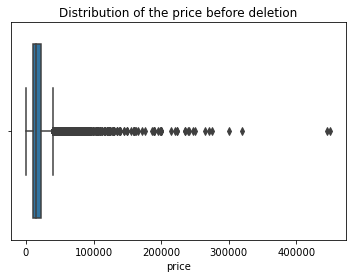

In [60]:
#Investigate price 
price = auto_data.price
sns.boxplot(price)
plt.title("Distribution of the price before deletion")
plt.show()
#so many outliers!

C:\Users\Tiki\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


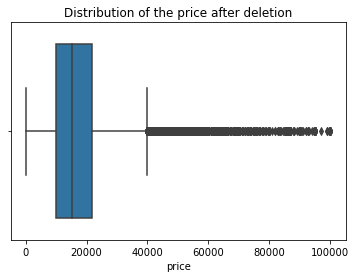

In [61]:
#We normally would vehicles over the 99th percentile to get rid of outliers but as this our explanatory variable
# so we eliminate vehicle's whose price is double the current 99th percentile of price
auto_data= auto_data[auto_data.price< 100000 ]
price = auto_data.price
sns.boxplot(price)
plt.title("Distribution of the price after deletion")
plt.show()

C:\Users\Tiki\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


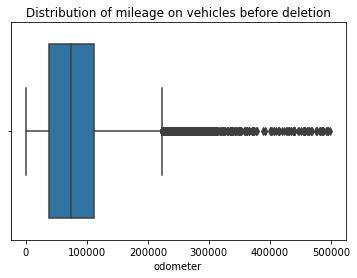

In [62]:
#Investigate Mileage
miles = auto_data.odometer
sns.boxplot(miles)
plt.title("Distribution of mileage on vehicles before deletion")
plt.show()
#so many outliers!

C:\Users\Tiki\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


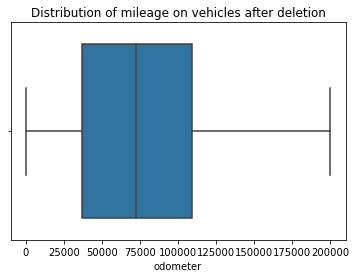

In [63]:
#We eliminate vehicles over the 99th percentile
auto_data= auto_data[auto_data.odometer< 200000 ]
miles = auto_data.odometer
sns.boxplot(miles)
plt.title("Distribution of mileage on vehicles after deletion")
plt.show()

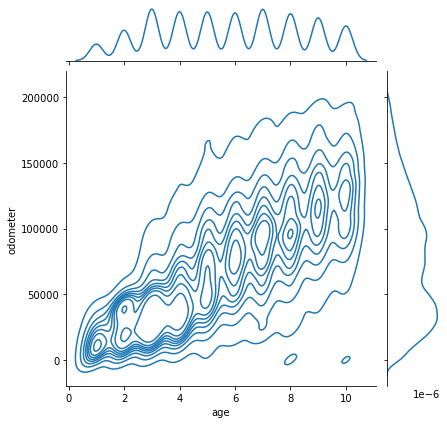

In [64]:
#Investigate Average Mileage
# Average Milage is the mileage divided by the age let's see that relationship 
g = sns.jointplot(x= 'age', y='odometer',data=auto_data , kind='kde')
_ = g.title = 'Age vs Mileage'
#We van see clustered Non Linear replationsip between age and mileage and some pretty clear boundries

C:\Users\Tiki\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


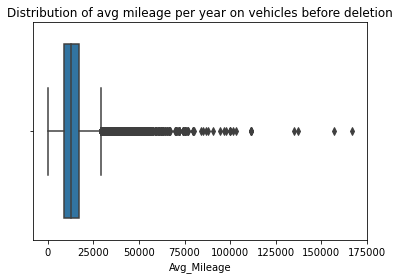

In [65]:
#Investigate Average Mileage using boxplot
avg_miles = auto_data.Avg_Mileage
sns.boxplot(avg_miles)
plt.title("Distribution of avg mileage per year on vehicles before deletion")
plt.show()
#so many outliers!

C:\Users\Tiki\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


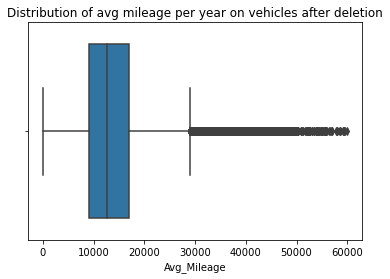

In [66]:
#We eliminate vehicles over the 99th percentile
auto_data= auto_data[auto_data.Avg_Mileage< 60000]
avg_miles = auto_data.Avg_Mileage
sns.boxplot(avg_miles)
plt.title("Distribution of avg mileage per year on vehicles after deletion")
plt.show()
plt.show()

C:\Users\Tiki\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


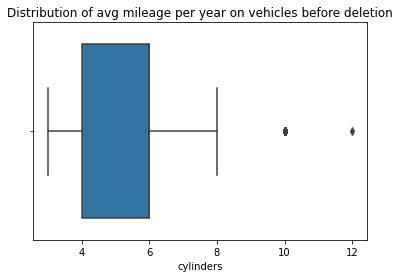

In [67]:
#Check Cylinders
#Investigate cylinders
cylinders = auto_data.cylinders
sns.boxplot(cylinders)
plt.title("Distribution of avg mileage per year on vehicles before deletion")
plt.show()
cylinders.value_counts()
#We eliminate 12 as it only has one value 
auto_data =  auto_data[auto_data['cylinders']<12]


<Figure size 1008x864 with 0 Axes>

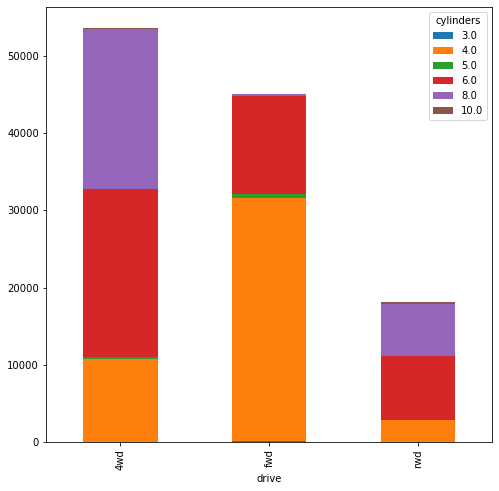

In [68]:
#There is an interesting relationship between cylinders, and drive
size_type_table = pd.crosstab(index=auto_data["drive"], columns=auto_data["cylinders"])
plt.figure(figsize=(14,12))
size_type_table.plot(kind="bar",  figsize=(8,8), stacked=True)
plt.show()

<Figure size 1008x864 with 0 Axes>

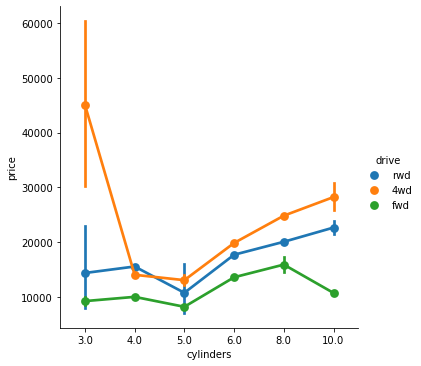

In [69]:
#There is an interesting relationship between cylinders, drive, mileage and price
plt.figure(figsize=(14,12))
sns.catplot(x="cylinders", y="price", hue='drive', kind='point', data=auto_data)
plt.show()

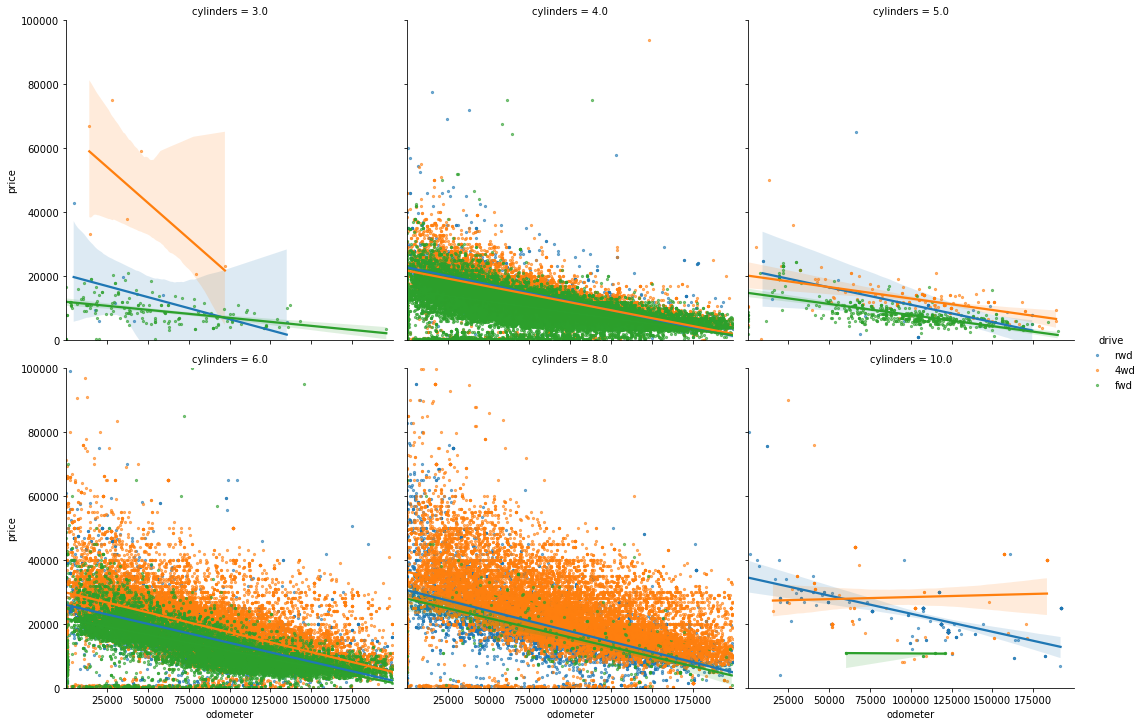

In [70]:
g = sns.lmplot(x= 'odometer', y='price', data=auto_data,  col="cylinders", hue='drive', col_wrap=3, scatter_kws={"alpha":.6, "s": 5})
g = (g.set( ylim=(0, 100000)))

In [71]:
# More visuals regarding the distributions are in eda3

## Cleaning Category/ type
* Category refers to the type of design of the vehicle ( examplesedan, hatchback), and it is something people take into consideration while buying a vehicle
* However the naming convention for this is non standard across manufactuers ("pickup" vs "truck" refers to the same type from Ford and GM respectively)
* Considering there are many users on Craigslist even though type is often in the description of a vehicle sold the naming convention would not be consistent from one user description to the next. 
* The type would not  use consistent rules through out it. To fix this we used a third party (see above merge.
* While the third party gave us a map for some of the vehicle it did not give us all the vehicles.
* Further the third party when it did merge often gave us a group of categories the vehicle could belonged to which needs to be narrowed down what is specific for that vehicle
* We are going to try to use the third party's categories and what's in the user description to go for type
* For the merge's we have we are going to check if the category within the description matches what the third party gave


In [72]:
#clean Category iin second option
auto_data['Category2']= auto_data['Category'].str.strip().str.split(', ').str[0]


#see what Categories are listed by third party
print(auto_data.Category.unique())

#Using the results from Category see  if a category is mentioned in the craig's list description
cat_list= ['Sedan' , 'Convertible' , 'Coupe' , 'Hatchback' , 'Pickup' , 'Wagon',  'Van' ,'Minivan',  'SUV']
auto_data['cat_tiki']= ''

# Find if Category is description saveas cat_tiki
for cat in cat_list:
    auto_data['cat_tiki']=np.where(auto_data.description.str.contains(cat , case=False, na=False), cat, '')
auto_data.info()

['Sedan' nan 'SUV' 'Sedan, Wagon' 'Coupe, Convertible' 'Hatchback'
 'Sedan, Coupe' 'Convertible, Coupe' 'Pickup' 'Hatchback, Sedan'
 'Van/Minivan' 'Sedan, Wagon, Coupe' 'Sedan, Hatchback' 'Wagon'
 'Sedan, Coupe, Hatchback' 'Hatchback, Convertible'
 'Sedan, Coupe, Convertible, Wagon' 'Sedan, Convertible' 'Coupe, Sedan'
 'Coupe' 'Sedan, Hatchback, Coupe' 'Coupe, Sedan, Convertible'
 'Convertible, Sedan' 'Wagon, Sedan' 'Sedan, Coupe, Wagon'
 'Coupe, Hatchback, Sedan' 'Sedan, Coupe, Wagon, Convertible'
 'Convertible' 'Coupe, Sedan, Hatchback'
 'Convertible, Wagon, Coupe, Sedan' 'Convertible, Sedan, Coupe'
 'Convertible, Coupe, Sedan' 'Sedan, Wagon, Coupe, Convertible'
 'Coupe, Convertible, Sedan, Wagon' 'Coupe, Convertible, Sedan'
 'Coupe, Convertible, Wagon, Sedan' 'Sedan, Coupe, Convertible'
 'Convertible, Sedan, Coupe, Wagon' 'Convertible, Coupe, Hatchback']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 118641 entries, 0 to 135726
Data columns (total 29 columns):
 #   Column        

In [73]:
# We aregoing to create a column Category Cleaned which has the imputed values for Category

#We need this to iterate
auto_data['cat_tiki_check0']= ''
auto_data['cat_tiki_check1']= ''
auto_data['cat_tiki_check2']= ''
auto_data['Category_Cleaned']= auto_data['Category2']
auto_data['cat_tiki_cleaned1']= auto_data['Category2']
auto_data['Category3'] =  auto_data['Category'].fillna('') 
auto_data['type3'] =  auto_data['type'].fillna('') 
auto_data['type4'] =  auto_data['type']
print(auto_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118641 entries, 0 to 135726
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 118641 non-null  int64  
 1   region             118641 non-null  object 
 2   price              118641 non-null  int64  
 3   year               118641 non-null  float64
 4   manufacturer       118238 non-null  object 
 5   model              118641 non-null  object 
 6   condition          118641 non-null  object 
 7   cylinders          118641 non-null  float64
 8   fuel               118641 non-null  object 
 9   odometer           118641 non-null  float64
 10  title_status       118635 non-null  object 
 11  transmission       118577 non-null  object 
 12  vin                86686 non-null   object 
 13  drive              116794 non-null  object 
 14  size               104456 non-null  object 
 15  type               105925 non-null  object 
 16  pa

In [74]:

#the data set came also with "type" which... I haven't seen the rules for so we are going to use it as a possible source.

#check if vehicle type listed in description is the sameone that is in the data 
auto_data['cat_tiki_check0']= auto_data.apply(lambda x: x.cat_tiki in x.type3, axis=1)

#Simiplify cat_tiki so that it makes an easier match
auto_data.loc[auto_data['cat_tiki_check0'] == True, 'type3'] = auto_data.cat_tiki

#check if vehicle type listed in description is in the third party group if there is a 3rd party group
auto_data['cat_tiki_check1']= auto_data.apply(lambda x: x.cat_tiki in x.Category3, axis=1)

#Where a Category in the description is in the third party's group of Category update values to reflect this match
auto_data.loc[auto_data['cat_tiki_check1'] == True, 'Category_Cleaned'] = auto_data.cat_tiki
auto_data2=auto_data

print(auto_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118641 entries, 0 to 135726
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 118641 non-null  int64  
 1   region             118641 non-null  object 
 2   price              118641 non-null  int64  
 3   year               118641 non-null  float64
 4   manufacturer       118238 non-null  object 
 5   model              118641 non-null  object 
 6   condition          118641 non-null  object 
 7   cylinders          118641 non-null  float64
 8   fuel               118641 non-null  object 
 9   odometer           118641 non-null  float64
 10  title_status       118635 non-null  object 
 11  transmission       118577 non-null  object 
 12  vin                86686 non-null   object 
 13  drive              116794 non-null  object 
 14  size               104456 non-null  object 
 15  type               105925 non-null  object 
 16  pa

In [75]:

#check if vehicle type listed in data is in categories use type that was also one of the one's listed by the third party
auto_data['cat_tiki_check2']= auto_data.apply(lambda x: x.type3 in x.Category3, axis=1)

#Switch the value in Category cleaned to the one that was included in type
auto_data.loc[auto_data['cat_tiki_check2'] == True, 'cat_tiki_cleaned1'] = auto_data.type


auto_data['Category_Cleaned'].fillna('cat_tiki_cleaned1',inplace = True)

#get rid of variables included only for iteration
auto_data= auto_data.drop(['Category3', 'type3', 'type4', 'cat_tiki_check0', 'cat_tiki_check1', 'cat_tiki_check2', 'cat_tiki_cleaned1' ], axis=1)

auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118641 entries, 0 to 135726
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                118641 non-null  int64  
 1   region            118641 non-null  object 
 2   price             118641 non-null  int64  
 3   year              118641 non-null  float64
 4   manufacturer      118238 non-null  object 
 5   model             118641 non-null  object 
 6   condition         118641 non-null  object 
 7   cylinders         118641 non-null  float64
 8   fuel              118641 non-null  object 
 9   odometer          118641 non-null  float64
 10  title_status      118635 non-null  object 
 11  transmission      118577 non-null  object 
 12  vin               86686 non-null   object 
 13  drive             116794 non-null  object 
 14  size              104456 non-null  object 
 15  type              105925 non-null  object 
 16  paint_color       11

In [76]:
new_file = 'auto_data_imputed_cl.csv'
new_file_name_path = os.path.join(basepath,sub_file, new_file)
auto_data.to_csv(new_file_name_path, index=False)

## Dropping Categorical Variables
* We want to reduce the number of unnecessary variables. Bellow are some of the reasons:
* We Eliminate categorical variables that are included in another variable (aka intercorrelation)
    * example keeping Category_cleaned  means we can get rid of Category, Category1, type, and cat_tiki
* We Eliminate categorical variables that are either unique to each vehicle (not counding id) or have too many categories within it because that would create too many dummy variables 
    * Descriptions and Vins are unique to each vehicle we can eliminate both variables
    * There are over 400 regions while this could be an interesting study we don't need it. It might be something to look into for another study
    * There are over 10000 models and while models are not completely unique to each vehicle considering we are trying to determine the asking price when we don't know the value of the model it goes around the point of the study. However again it could be something to look into.
* We eliminate variables that have only one value as the don't add anything to the model
    * title status
*  We have state data, as well as  long and lat therefore we get rid of the 50 state dummy variables this could be re included

In [77]:
auto_data.select_dtypes(exclude=['int64', 'float']).nunique()

region                402
manufacturer           39
model                8125
condition               5
fuel                    5
title_status            1
transmission            3
vin                 48368
drive                   3
size                    4
type                   12
paint_color            13
description         99142
state                  51
Category               38
Category1              38
Category2               8
cat_tiki                2
Category_Cleaned       10
dtype: int64

In [78]:
#drop variables due to intercorrelation to Category Cleaned

z2= auto_data.drop(columns=['Category', 'Category1', 'Category2', 'cat_tiki'] )

#drop categorical variables unique to each entry and/or having over 100 categories within
z2 =z2.drop(columns= ['region', 'model', 'description', 'vin' ], axis=1)

#drop state due to combo of intercorrelation and too many variables
z2 =z2.drop(columns= ['state'], axis=1)

#drop to having only 1 value
z2 =z2.drop(columns= ['title_status'], axis=1)



In [79]:
tes = z2[z2.manufacturer == 'Tesla']
tes.drive.mode()[0]
print(tes.count())
z2.loc[(z2.manufacturer == 'Tesla') & (z2['drive'].isna()), 'drive'] = 'rwd' 


id                  20
price               20
year                20
manufacturer        20
condition           20
cylinders           20
fuel                20
odometer            20
transmission        20
drive               14
size                14
type                17
paint_color         20
lat                 20
long                20
age                 20
MSRP                 0
Avg_Mileage         20
resid                0
Category_Cleaned    20
dtype: int64


In [80]:

print(tes.count())
z2.loc[(z2.manufacturer == 'Tesla') & (z2['drive'].isna()), 'drive'] = 'rwd' 
z2.loc[(z2.manufacturer == 'Tesla') & (z2['size'].isna()), 'size'] = 'mid-size' 
tes = z2[z2.manufacturer == 'Tesla']
print(tes.count())
print(tes.isnull().sum())

id                  20
price               20
year                20
manufacturer        20
condition           20
cylinders           20
fuel                20
odometer            20
transmission        20
drive               14
size                14
type                17
paint_color         20
lat                 20
long                20
age                 20
MSRP                 0
Avg_Mileage         20
resid                0
Category_Cleaned    20
dtype: int64
id                  20
price               20
year                20
manufacturer        20
condition           20
cylinders           20
fuel                20
odometer            20
transmission        20
drive               20
size                20
type                17
paint_color         20
lat                 20
long                20
age                 20
MSRP                 0
Avg_Mileage         20
resid                0
Category_Cleaned    20
dtype: int64
id                   0
price                0
year    

In [81]:
z2.manufacturer.value_counts()

Ford             23066
Chevrolet        18930
Toyota            8371
Nissan            7914
Jeep              5987
Honda             5521
Ram               5370
Gmc               5126
Dodge             4632
Hyundai           3907
Volkswagen        3178
Kia               3146
Bmw               3133
Subaru            2804
Mercedes-Benz     2779
Chrysler          1973
Cadillac          1582
Audi              1578
Buick             1499
Mazda             1412
Lexus             1093
Infiniti          1033
Acura              643
Mini               615
Volvo              581
Mitsubishi         562
Lincoln            561
Rover              447
Fiat               386
Jaguar             200
Mercury            101
Pontiac             42
Tesla               20
Alfa-Romeo          17
Saturn              14
Ferrari              8
Porche               3
Land-Rover           2
Aston-Martin         2
Name: manufacturer, dtype: int64

In [82]:
print(z2.isnull().sum())

id                       0
price                    0
year                     0
manufacturer           403
condition                0
cylinders                0
fuel                     0
odometer                 0
transmission            64
drive                 1841
size                 14179
type                 12716
paint_color              0
lat                      0
long                     0
age                      0
MSRP                104589
Avg_Mileage              0
resid               104589
Category_Cleaned         0
dtype: int64


In [83]:
#Dropping Nulls- We prefer our data to be without nulls with the exception of MSRP and resid there are few nulls so we eliminate those

z2= z2.dropna(subset=['id', 'price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'drive', 'paint_color', 'lat',
       'long', 'age', 'Avg_Mileage', 'Category_Cleaned'])
z2.manufacturer.value_counts()

Ford             22816
Chevrolet        18808
Toyota            8149
Nissan            7816
Jeep              5974
Honda             5434
Ram               5222
Gmc               5035
Dodge             4590
Hyundai           3881
Volkswagen        3128
Kia               3121
Bmw               2904
Subaru            2778
Mercedes-Benz     2672
Chrysler          1958
Cadillac          1551
Buick             1472
Audi              1418
Mazda             1403
Lexus             1068
Infiniti           996
Acura              626
Mini               604
Volvo              573
Lincoln            558
Mitsubishi         553
Rover              445
Fiat               384
Jaguar             190
Mercury            101
Pontiac             42
Tesla               20
Alfa-Romeo          17
Saturn              14
Ferrari              8
Porche               3
Land-Rover           2
Aston-Martin         2
Name: manufacturer, dtype: int64

In [84]:
z2.manufacturer.value_counts()
#drop if less than 10 in the category
z2 = z2[z2.manufacturer != 'Ferrari']
z2 = z2[z2.manufacturer != 'Porche']
z2 = z2[z2.manufacturer != 'Aston-Martin']
z2 = z2[z2.manufacturer != 'Land-Rover']
#We are not loooking up superluxury cars aka
z2.manufacturer.value_counts()


Ford             22816
Chevrolet        18808
Toyota            8149
Nissan            7816
Jeep              5974
Honda             5434
Ram               5222
Gmc               5035
Dodge             4590
Hyundai           3881
Volkswagen        3128
Kia               3121
Bmw               2904
Subaru            2778
Mercedes-Benz     2672
Chrysler          1958
Cadillac          1551
Buick             1472
Audi              1418
Mazda             1403
Lexus             1068
Infiniti           996
Acura              626
Mini               604
Volvo              573
Lincoln            558
Mitsubishi         553
Rover              445
Fiat               384
Jaguar             190
Mercury            101
Pontiac             42
Tesla               20
Alfa-Romeo          17
Saturn              14
Name: manufacturer, dtype: int64

In [85]:
print(z2.isnull().sum())

id                       0
price                    0
year                     0
manufacturer             0
condition                0
cylinders                0
fuel                     0
odometer                 0
transmission             0
drive                    0
size                 12445
type                 12463
paint_color              0
lat                      0
long                     0
age                      0
MSRP                102270
Avg_Mileage              0
resid               102270
Category_Cleaned         0
dtype: int64


## Eliminate variables due to intercorrelation

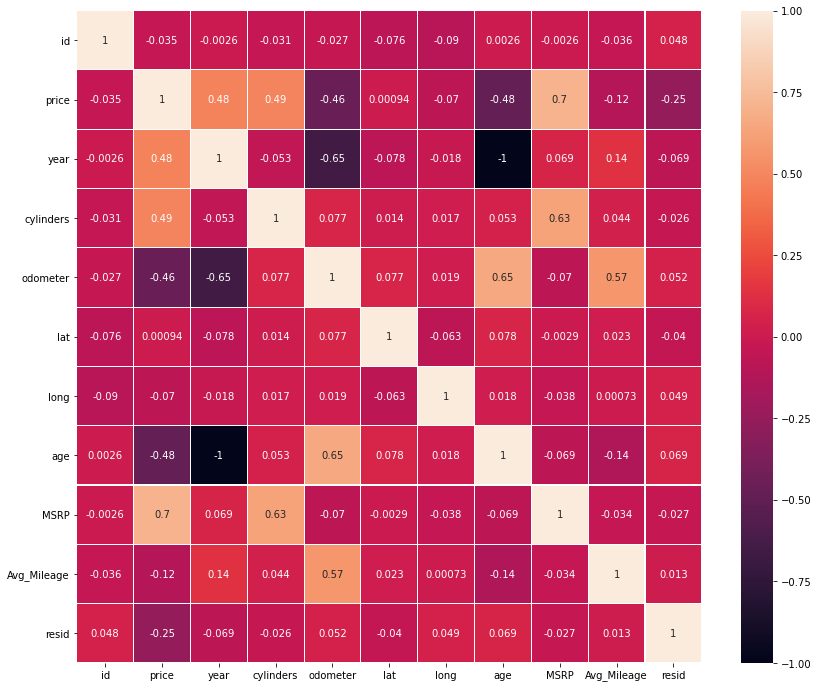

In [86]:
#plot correlation
plt.figure(figsize=(14,12))
sns.heatmap(z2.corr(),linewidths=.1, annot=True)
plt.yticks(rotation=0);
plt.savefig('correlation',bbox_inches='tight')

## Chosing Scaler Standardization

#### Standizing Data
* We have a few methods of standardization to choose from: Robust, Minmax, Normalize and Standardize
* We use Robust if we want to minimize impact of outliers
* We use Normalize if we think the distrubtion within a variable needs to be normalized and/or has a normal distribution
* We use Standardize when we think most of the variables have similar distribution and no/few dummy variables

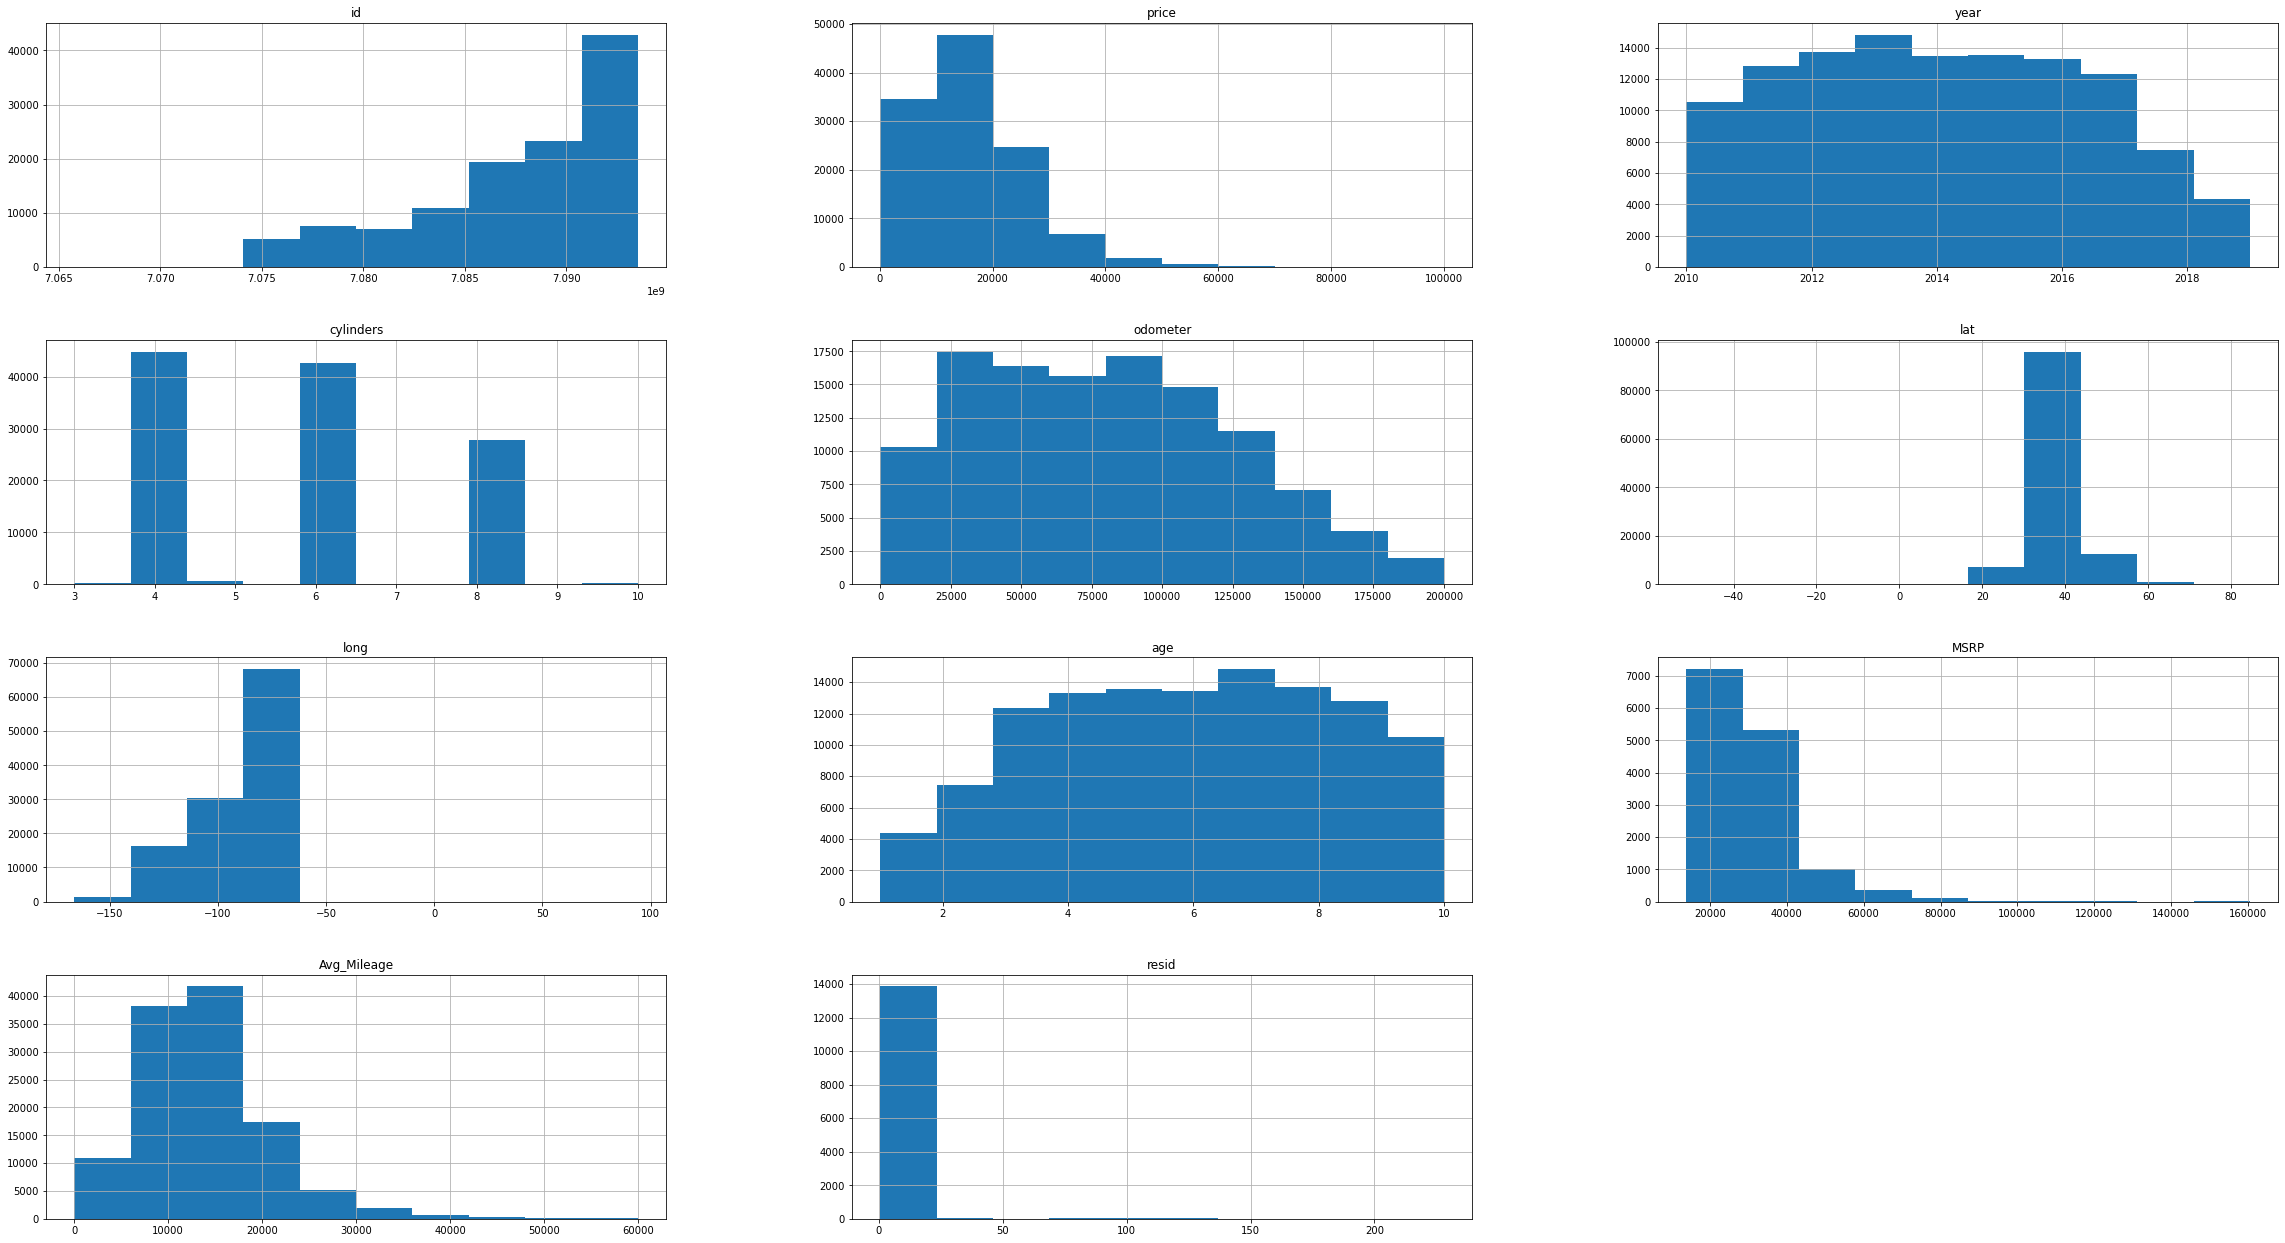

In [87]:
hist = z2.hist(figsize=(40,22))
#The data for price is and age are not a normal destribution so both normalize scaler is bad idea 

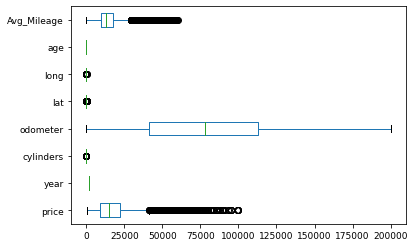

In [88]:
z3 = z2.drop(columns=['id', 'MSRP', 'resid'])
boxplot = z3.boxplot(grid=False, vert=False,fontsize=9)
#No large outliers as that was cleaned out already earlier will not use Robust Scaler

#### Choosing Min Max Scaler
* The data for price is and age are not a normal destribution we eliminate normalize scaler
* No large outliers as that was cleaned out already earlier we eliminate  Robust Scaler
* As we have dummy variables we can eliminate standard scaler 
* That leaves us with Min Max Zx

## Create Dummy Variables

In [89]:
#create dummy variables
auto_data_dummies= pd.get_dummies(z3) #changed from z2
auto_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116321 entries, 0 to 135726
Data columns (total 98 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   price                               116321 non-null  int64  
 1   year                                116321 non-null  float64
 2   cylinders                           116321 non-null  float64
 3   odometer                            116321 non-null  float64
 4   lat                                 116321 non-null  float64
 5   long                                116321 non-null  float64
 6   age                                 116321 non-null  float64
 7   Avg_Mileage                         116321 non-null  float64
 8   manufacturer_Acura                  116321 non-null  uint8  
 9   manufacturer_Alfa-Romeo             116321 non-null  uint8  
 10  manufacturer_Audi                   116321 non-null  uint8  
 11  manufacturer_Bmw          

In [90]:
new_file = 'auto_data_dummies.csv'
new_file_name_path = os.path.join(basepath,sub_file, new_file)
auto_data_dummies.to_csv(new_file_name_path, index=False)

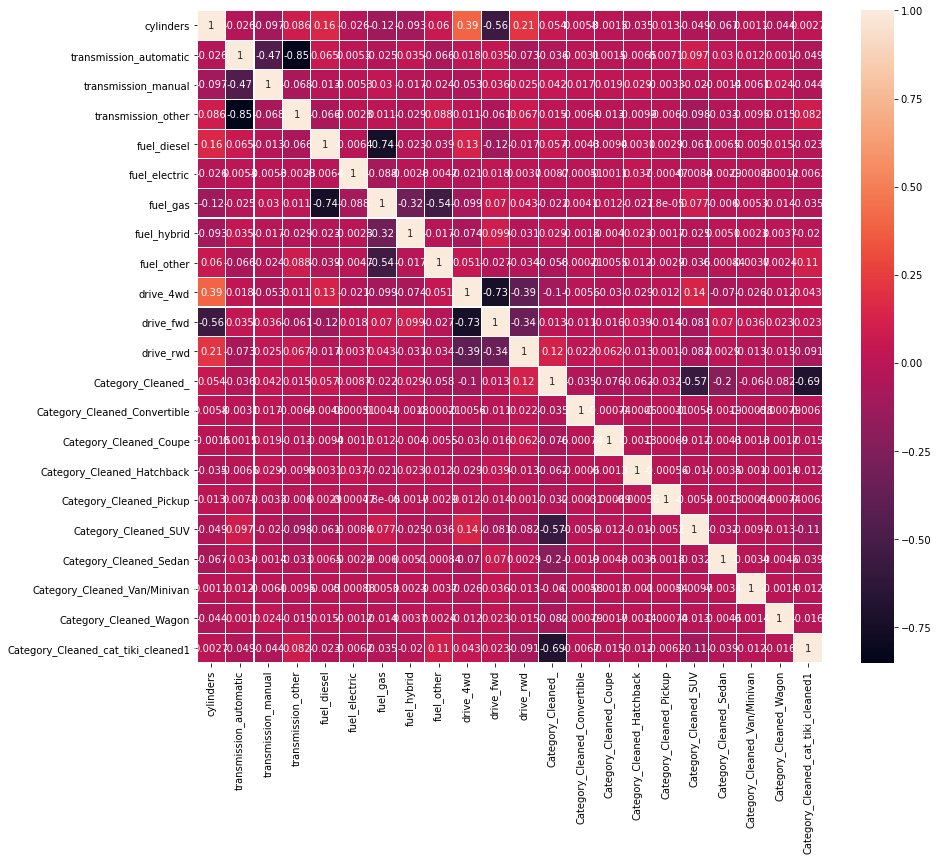

In [91]:
#check correlation between some dummy variables
auto_data_cats= z2[['transmission', 'cylinders', 'fuel', 'drive', 'Category_Cleaned']]
auto_data_dummies_small= pd.get_dummies(auto_data_cats)


plt.figure(figsize=(14,12))
sns.heatmap(auto_data_dummies_small.corr(),linewidths=.1, annot=True)
plt.yticks(rotation=0);
plt.savefig('correlation',bbox_inches='tight')


## Seperate Data for Test and Trial

In [92]:

#seperate X and y from each other
X = auto_data_dummies
print(type(X))
y = auto_data_dummies['price']

X =X.drop(columns=['price'], axis=1)
X.info()


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 116321 entries, 0 to 135726
Data columns (total 97 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   year                                116321 non-null  float64
 1   cylinders                           116321 non-null  float64
 2   odometer                            116321 non-null  float64
 3   lat                                 116321 non-null  float64
 4   long                                116321 non-null  float64
 5   age                                 116321 non-null  float64
 6   Avg_Mileage                         116321 non-null  float64
 7   manufacturer_Acura                  116321 non-null  uint8  
 8   manufacturer_Alfa-Romeo             116321 non-null  uint8  
 9   manufacturer_Audi                   116321 non-null  uint8  
 10  manufacturer_Bmw                    116321 non-null  u

In [93]:

#split train, trial and vals

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.25, random_state=42)

X_train.info()

# Create val and train sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 3/11)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87240 entries, 127139 to 18466
Data columns (total 97 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                87240 non-null  float64
 1   cylinders                           87240 non-null  float64
 2   odometer                            87240 non-null  float64
 3   lat                                 87240 non-null  float64
 4   long                                87240 non-null  float64
 5   age                                 87240 non-null  float64
 6   Avg_Mileage                         87240 non-null  float64
 7   manufacturer_Acura                  87240 non-null  uint8  
 8   manufacturer_Alfa-Romeo             87240 non-null  uint8  
 9   manufacturer_Audi                   87240 non-null  uint8  
 10  manufacturer_Bmw                    87240 non-null  uint8  
 11  manufacturer_Buick                  

## Scale data vased on previous data

In [94]:
#standardize numeric variables
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#create scaler
scaler = MinMaxScaler()
scaler_sc = StandardScaler()

#Scale numeric data1
X_train_mm = scaler.fit_transform(X_train)
X_val_mm = scaler.transform(X_val)
X_test_mm = scaler.transform(X_test)

In [95]:
type(X_train)
print(type(X_train.columns.tolist()))

<class 'list'>


In [96]:
df_cl_list=X_train.columns.tolist()
df3 = pd.DataFrame(X_train_mm, columns = df_cl_list)
df3 = df3.iloc[:, : 10]
df3.describe()

,year,cylinders,odometer,lat,long,age,Avg_Mileage,manufacturer_Acura,manufacturer_Alfa-Romeo,manufacturer_Audi
count,63447.000000,63447.000000,63447.000000,63447.000000,63447.000000,63447.000000,63447.000000,63447.000000,63447.000000,63447.000000
mean,0.449267,0.387068,0.399618,0.659630,0.288945,0.550733,0.233026,0.005390,0.000095,0.012562
std,0.283562,0.224531,0.228734,0.039917,0.062446,0.283562,0.115368,0.073221,0.009724,0.111374
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.142857,0.206592,0.627282,0.265086,0.333333,0.158564,0.000000,0.000000,0.000000
50%,0.444444,0.428571,0.390014,0.663202,0.310082,0.555556,0.220449,0.000000,0.000000,0.000000
75%,0.666667,0.428571,0.565700,0.689231,0.331248,0.777778,0.290706,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


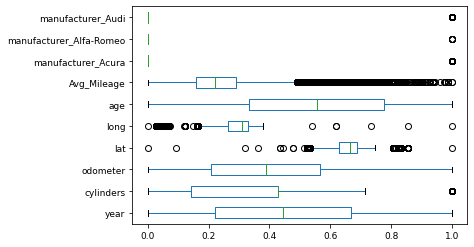

In [97]:
boxplot = df3.boxplot(grid=False, vert=False,fontsize=9)

In [98]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.0001, solver='cholesky')

#Instantiate and fit a ridge reg to the min_max scaled data
ridge_scaled = ridge.fit(X_train_mm, y_train)


# Instantiate and fit ridge reg classifier to the unscaled data
ridge_unscaled = ridge.fit(X_train, y_train)

y_pred_mm = ridge_scaled.predict(X_val_mm)
y_pred = ridge_unscaled.predict(X_val)

# Compute and print metrics
print('Accuracy with Min Max Scaling: {}'.format(ridge_scaled.score(X_val_mm, y_val)))
print('Accuracy without Scaling: {}'.format(ridge_unscaled.score(X_val, y_val)))


C:\Users\Tiki\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.94043e-19): result may not be accurate.
  overwrite_a=True).T


Accuracy with Min Max Scaling: -25334.979912678653
Accuracy without Scaling: 0.6970279776661167


## Testing Models

### Ridge Regression

In [101]:
# Testing different Ridge Regressions
params_Ridge = {'alpha': [0.1,0.01,0.001,0.0001] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr']}
ridge_reg = Ridge()
Ridge_GS = GridSearchCV(ridge_reg, param_grid=params_Ridge, cv=5, verbose=8)

Ridge_GS.fit(X_train_mm, y_train)
print('For non scaled data using Ridge Regression')
print('Best Score: {}'.format(Ridge_GS.best_score_))
print('Best estimator: {}'.format(Ridge_GS.best_estimator_))
print('Best parameters: {}'.format(Ridge_GS.best_params_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] alpha=0.1, fit_intercept=True, solver=svd .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0.1, fit_intercept=True, solver=svd, score=0.701, total=   1.2s
[CV] alpha=0.1, fit_intercept=True, solver=svd .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, solver=svd, score=0.695, total=   2.1s
[CV] alpha=0.1, fit_intercept=True, solver=svd .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, solver=svd, score=0.693, total=   1.3s
[CV] alpha=0.1, fit_intercept=True, solver=svd .......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, solver=svd, score=0.700, total=   1.4s
[CV] alpha=0.1, fit_intercept=True, solver=svd .......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.0s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, solver=svd, score=0.695, total=   1.7s
[CV] alpha=0.1, fit_intercept=True, solver=cholesky ..................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.7s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, solver=cholesky, score=0.701, total=   0.6s
[CV] alpha=0.1, fit_intercept=True, solver=cholesky ..................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.3s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, solver=cholesky, score=0.695, total=   0.6s
[CV] alpha=0.1, fit_intercept=True, solver=cholesky ..................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.9s remaining:    0.0s


[CV]  alpha=0.1, fit_intercept=True, solver=cholesky, score=0.693, total=   0.4s
[CV] alpha=0.1, fit_intercept=True, solver=cholesky ..................
[CV]  alpha=0.1, fit_intercept=True, solver=cholesky, score=0.700, total=   0.5s
[CV] alpha=0.1, fit_intercept=True, solver=cholesky ..................
[CV]  alpha=0.1, fit_intercept=True, solver=cholesky, score=0.695, total=   0.5s
[CV] alpha=0.1, fit_intercept=True, solver=lsqr ......................
[CV]  alpha=0.1, fit_intercept=True, solver=lsqr, score=0.700, total=   0.9s
[CV] alpha=0.1, fit_intercept=True, solver=lsqr ......................
[CV]  alpha=0.1, fit_intercept=True, solver=lsqr, score=0.694, total=   0.9s
[CV] alpha=0.1, fit_intercept=True, solver=lsqr ......................
[CV]  alpha=0.1, fit_intercept=True, solver=lsqr, score=0.693, total=   1.0s
[CV] alpha=0.1, fit_intercept=True, solver=lsqr ......................
[CV]  alpha=0.1, fit_intercept=True, solver=lsqr, score=0.699, total=   0.9s
[CV] alpha=0.1, fit_int

[CV]  alpha=0.001, fit_intercept=True, solver=svd, score=0.693, total=   2.0s
[CV] alpha=0.001, fit_intercept=True, solver=svd .....................
[CV]  alpha=0.001, fit_intercept=True, solver=svd, score=0.700, total=   1.5s
[CV] alpha=0.001, fit_intercept=True, solver=svd .....................
[CV]  alpha=0.001, fit_intercept=True, solver=svd, score=0.695, total=   1.2s
[CV] alpha=0.001, fit_intercept=True, solver=cholesky ................
[CV]  alpha=0.001, fit_intercept=True, solver=cholesky, score=0.701, total=   0.4s
[CV] alpha=0.001, fit_intercept=True, solver=cholesky ................
[CV]  alpha=0.001, fit_intercept=True, solver=cholesky, score=0.695, total=   0.4s
[CV] alpha=0.001, fit_intercept=True, solver=cholesky ................
[CV]  alpha=0.001, fit_intercept=True, solver=cholesky, score=0.693, total=   0.4s
[CV] alpha=0.001, fit_intercept=True, solver=cholesky ................
[CV]  alpha=0.001, fit_intercept=True, solver=cholesky, score=0.700, total=   0.4s
[CV] alp

[CV]  alpha=0.0001, fit_intercept=False, solver=lsqr, score=0.694, total=   0.6s
[CV] alpha=0.0001, fit_intercept=False, solver=lsqr ..................
[CV]  alpha=0.0001, fit_intercept=False, solver=lsqr, score=0.692, total=   0.7s
[CV] alpha=0.0001, fit_intercept=False, solver=lsqr ..................
[CV]  alpha=0.0001, fit_intercept=False, solver=lsqr, score=0.697, total=   0.6s
[CV] alpha=0.0001, fit_intercept=False, solver=lsqr ..................
[CV]  alpha=0.0001, fit_intercept=False, solver=lsqr, score=0.692, total=   0.7s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.8min finished


For non scaled data using Ridge Regression
Best Score: 0.6966716132123969
Best estimator: Ridge(alpha=0.1, fit_intercept=False, solver='svd')
Best parameters: {'alpha': 0.1, 'fit_intercept': False, 'solver': 'svd'}


In [102]:
Ridgeregression = Ridge(random_state=42, **Ridge_GS.best_params_)
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=Ridgeregression, X=X_train_mm, y=y_train, cv=5)
print(all_accuracies)

Ridgeregression.fit(X_train_mm, y_train)
ridge_score= Ridgeregression.score(X_val_mm, y_val)

print('Ridge using outside test_data : {}'.format(ridge_score))


[0.70099163 0.69465934 0.69323886 0.69989423 0.69457401]
Ridge using outside test_data : 0.6970282396060393


### Testing Logistic Regression

In [103]:

from sklearn.linear_model import LogisticRegression

Cs = [0.0001, 0.001,  0.1,  1, 10, 100, 1000]
clf_scores =[]
clf_C_dict = {}


clf = LogisticRegression()
# Fit the model on the trainng data.

param_grid = {'C': Cs}

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(clf, param_grid, cv=5, verbose=5)


In [104]:
#yeah this didn't work
"""# Fit it to the data
logreg_cv.fit(X_train_mm,y_train)



print('For Min Max scaled data using Logistic  Regression')
print('Best Score: {}'.format(logreg_cv.best_score_))
print('Best estimator: {}'.format(logreg_cv.best_estimator_))
print('Best parameters: {}'.format(logreg_cv.best_params_))


LogisticRegression_t = clf(random_state=42, **logreg_cv.best_params_)
all_accuracies_lg = cross_val_score(estimator= LogisticRegression_t, X=X_train_mm, y=y_train, cv=5)
print(all_accuracies_lg)

LogisticRegression_t.fit(X_train_mm, y_train)
LogisticRegression_t.score(X_val_mm, y_val)


log_score= LogisticRegression_t.score(X_val_mm, y_val)
print('Logistic using outside test_data : {}'.format(log_score))

"""

Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\Users\Tiki\anaconda\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.0001 ........................................................


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Tiki\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-104-cd25da496869>", line 2, in <module>
    logreg_cv.fit(X_train_mm,y_train)
  File "C:\Users\Tiki\anaconda\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\Tiki\anaconda\lib\site-packages\sklearn\model_selection\_search.py", line 736, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\Tiki\anaconda\lib\site-packages\sklearn\model_selection\_search.py", line 1188, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "C:\Users\Tiki\anaconda\lib\site-packages\sklearn\model_selection\_search.py", line 715, in evaluate_candidates
    cv.split(X, y, groups)))
  File "C:\Users\Tiki\anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_ba

TypeError: object of type 'NoneType' has no len()

In [ ]:
### Testing Linear Regression

In [109]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)

print('For Min Max scaled data using Linear  Regression')
print('Best Score: {}'.format(grid.best_score_))
print('Best estimator: {}'.format(grid.best_estimator_))
print('Best parameters: {}'.format(grid.best_params_))

For Min Max scaled data using Linear  Regression
Best Score: 0.6966692627023784
Best estimator: LinearRegression(fit_intercept=False, normalize=True)
Best parameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True}


In [111]:
LinearRegression_t = LinearRegression( **grid.best_params_)
all_accuracies_lin = cross_val_score(estimator= LinearRegression_t, X=X_train_mm, y=y_train, cv=5)
print(all_accuracies_lin)

LinearRegression_t.fit(X_train_mm, y_train)
LinearRegression_t.score(X_val_mm, y_val)

lin_score= LinearRegression_t.score(X_val_mm, y_val)
print('Linear using outside test_data : {}'.format(lin_score))


[0.70100668 0.69466025 0.69325173 0.69984735 0.69455884]
Linear using outside test_data : 0.6970216672098726


### Linear PCA chained

For Min Max scaled data using chained PCA and Linear  Regression
Best Score: 0.6907441697962611
Best estimator: Pipeline(steps=[('pca', PCA(n_components=64)), ('linear', LinearRegression())])
Best parameters: {'linear__fit_intercept': True, 'linear__normalize': False, 'pca__n_components': 64}


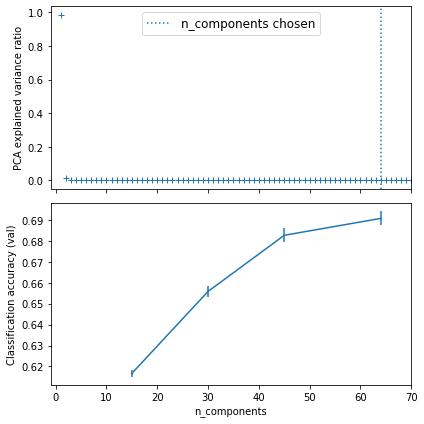

In [112]:

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
linear = LinearRegression()
pipe = Pipeline(steps=[('pca', pca), ('linear', linear)])


# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [15, 30, 45, 64, 100, 108],
    'linear__fit_intercept':[True,False],
    'linear__normalize':[True,False],
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)

print('For Min Max scaled data using chained PCA and Linear  Regression')
print('Best Score: {}'.format(search.best_score_))
print('Best estimator: {}'.format(search.best_estimator_))
print('Best parameters: {}'.format(search.best_params_))

# Plot the PCA spectrum
pca.fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

In [113]:
pipe2 = Pipeline(steps=[('pca', pca), ('linear', linear)])

clf_t = pipe2(**search.best_params_)
all_accuracies_pipe = cross_val_score(estimator= clf_t, X=X_train_mm, y=y_train, cv=5)
print(all_accuracies_pipe)

clf_t.fit(X_train_mm, y_train)
clf_t.score(X_val_mm, y_val)

clf_t_score= clf_t_t.score(X_val_mm, y_val)
print('Logistic using outside test_data : {}'.format(clf_t_score))

TypeError: 'Pipeline' object is not callable